In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200

In [2]:
df = pd.read_csv('cleaned_data.csv')

df.shape, df.columns

((26664, 30),
 Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month', 'EDUCATION_CAT', 'graduate school',
        'high school', 'others', 'university'],
       dtype='object'))

Now to find proportion of the positive class for the target variable. As this is a binary classification, __.mean()__ suffices.

In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count() #this gives us the actual count (i.e. 5914/(20750+5914) = 0.2217..)

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

As the class fraction (proportion of positive and negative samples) are not equal (a balanced data set := 50/50 split), this dataset is (somewhat) __imbalanced__. <br>
Various methods to undertake: <br>
1. __Undersampling__ the majority class: randomly throwing out samples from the majority class until the class fractions are equal ot less imbalanced. <br>
2. __Oversampling__ the minority class: randomly adding duplicate samples of the minority class to achieve the same goal.
3. __Weighting samples__: This is performed as part of the training step, so minority class collectively has as much *emphasis* as the majority class in this fitted model.

In [5]:
from sklearn.linear_model import LogisticRegression 

my_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
max_iter=100,multi_class= 'auto', n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.0001,
verbose=0, warm_start=False) #explicitly instantiating the attributes/parameters (in this case default settings)
my_lr

LogisticRegression(solver='warn')

In [6]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

We will create take a sample of our data set to use for modeling.

In [7]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) #reshape into column vector
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [8]:
y = df['default payment next month'][0:10].values
y #this remains a row vector (shape (10,) = (10,1) )

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
my_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [10]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X.shape

(10, 1)

In [11]:
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Generating synthetic data using numpy

In [13]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

Will create data that follows the assumptions of linear regression, but has normally distributed (Gaussian) errors (noise): <br>
y = ax + b + N($\mu$, $\sigma$); where $N$ is the function for Gaussian noise. Note $a,b \in \R$ and $x$ is our feature array. 

In [14]:
np.random.seed(seed=1)
slope = 0.25 #a
intercept = -1.25 #b
y = slope*X + intercept + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) #loc = mean and scale = standard dev.


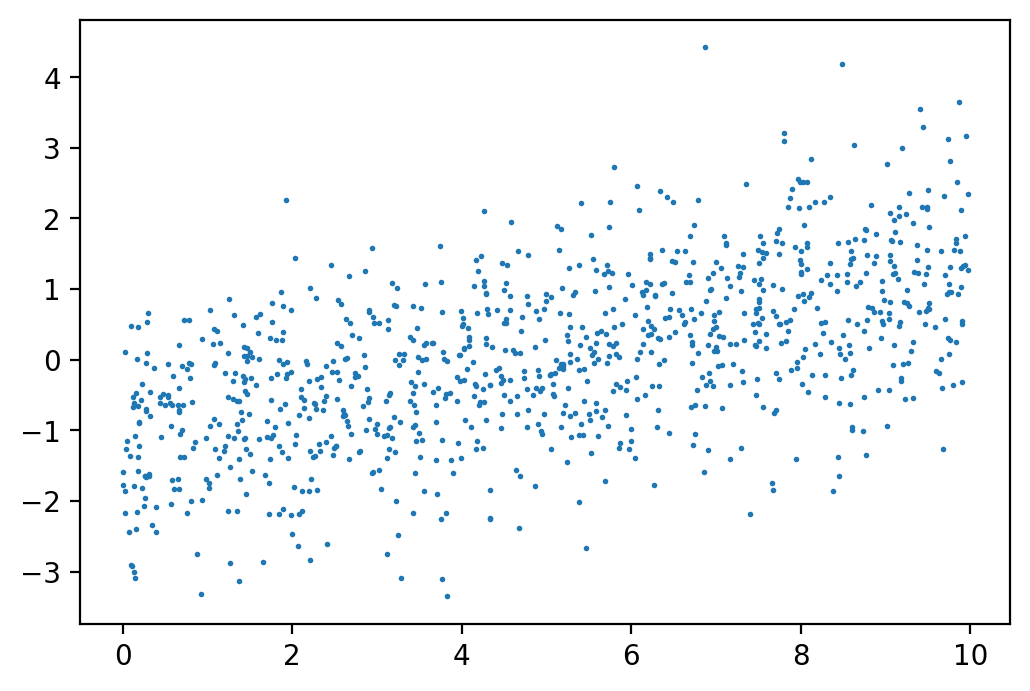

In [15]:
plt.scatter(X,y, s=1) #s indicates size of dots

Will create a linear regression for the above dataset.

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
lin_reg.fit(X.reshape(-1,1),y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_ #intercept of fitted model & slope of fitted model/line

(-1.1612566002825888, array([0.24002588]))

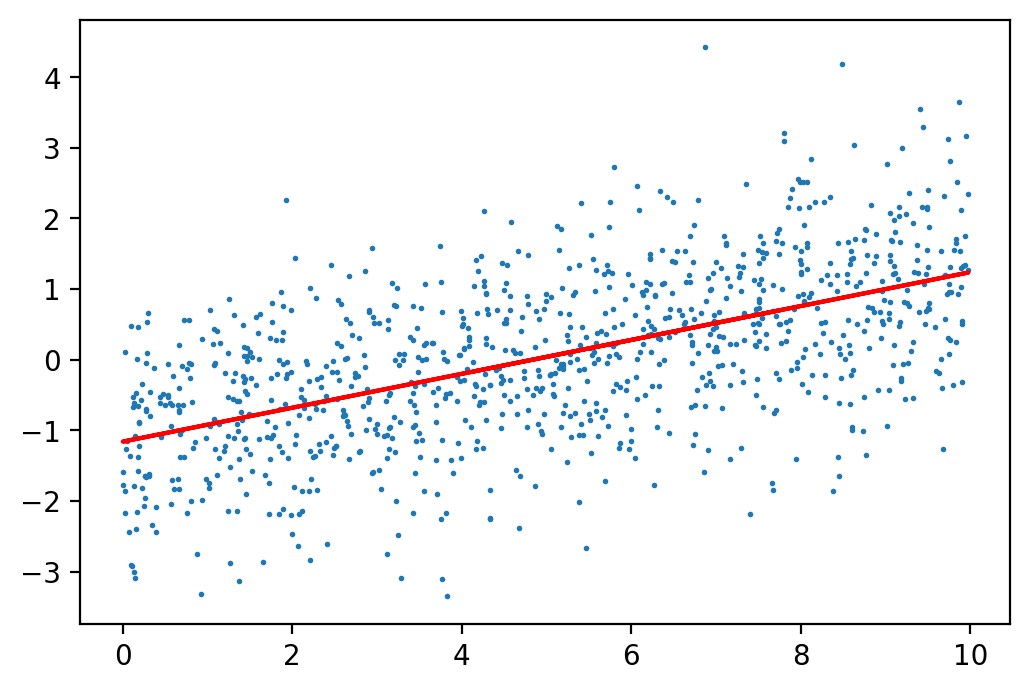

In [18]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X,y,s=1)
plt.plot(X,y_pred, 'r')

We will look into __train_test_split()__ of our data. Note it is good to check that the fraction of the positive class (i.e. nature of the data is the same), via __np.mean(y_train)__ and __np.mean(y_test)__. In case the fractions are noticeably different, might be important to use __stratified sampling__ via keyword argument __stratify__ in the train_test_split; this guaranteees that the class fractions will be equal or very similar between the train/test splits.

Note that since a model trained on older features and responses will be used to make predictions on newer data, if the data spans a substantial period of time (say 2 years) it will be good practice to sequentially train the model on 12 months and test on the month, or month after that, until exhausted all the data to get a few different testing scores for insight. 

<h1>Classification Accuracy </h1><br>
This is the proportion of samples that were correctly classified.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

np.mean(y_train), np.mean(y_test)

(0.223102526838873, 0.21657603600225014)

In [20]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
n_jobs=None, multi_class='auto', penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)

example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [21]:
y_pred = example_lr.predict(X_test)

One way to calculate accuracy is to create a logical mask that is __True__ whenever the predicted label is equal to the actual label, and __False__ otherwise. Then the average of this mask will give us the proportion of correct classifications.

In [22]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

Two less explicit methods are highlighted below:

In [23]:
from sklearn import metrics
example_lr.score(X_test, y_test), metrics.accuracy_score(y_test, y_pred)

(0.7834239639977498, 0.7834239639977498)

Calculating __True Positive Rate__ (TPR) and __True Negative Rate__(TNR) via __Confusion Matrix__

In [24]:
P = sum(y_test)
P

1155

In [25]:
TP = sum((y_test == 1) & (y_pred==1)) #Positives we predicted correctly
TP

0

In [26]:
TPR = TP/P
TPR

0.0

In [27]:
FN = sum((y_test == 1) & (y_pred==0)) #We predicted negative but actually positive
FN

1155

In [28]:
FNR = FN/P
FNR

1.0

Since TPR = 0, it seems every positive sample was predicted to be negative, and so none were correctly predicted. 

In [29]:
N = sum(y_test==0)
TN = sum((y_test==0)&(y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR, FPR = TN/N, FP/N
N, TNR, FPR

(4178, 1.0, 0.0)

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

Note that __TPR__ is also called __recall__ and __sensitivity__. Whereas __precision__ is the proportion of positive predictions that are correct (as opposed to proportion of positive samples that are correctly predicted).

<h2> Logistic Regression to make Predictions </h2> <br>
The output of Logistic Regression are not binary labels but __probabilities__ on a scale from 0 to 1. These probabilities are transformed into binary predictions through the use of a __threshold__. The default threshold in scikit-learn is 0.5, meaning any sample with predicted probability of atleast 0.5 is identified as positive, otherwise negative. Choosing the threshold is one of the key parameters of logistic regression. <br>

Note the __.predict()__ method are predictions made on the assumption of the default threshold of 0.5. <br>
To directly access the predicted probabilities of these samples, use the __.predict_proba()__ method.

In [31]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

The first column is the probability for negative class membership of that data feature, the second is the probability for positive class membership.

In [32]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum, prob_sum.shape, np.unique(prob_sum) #since all sums to one, sufficient to only consider second column

(array([1., 1., 1., ..., 1., 1., 1.]), (5333,), array([1.]))

In [33]:
pos_proba = y_pred_proba[:,-1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

We'll plot the positive probabilities to get a visual on how they are distributed.

Text(0, 0.5, 'Number of samples')

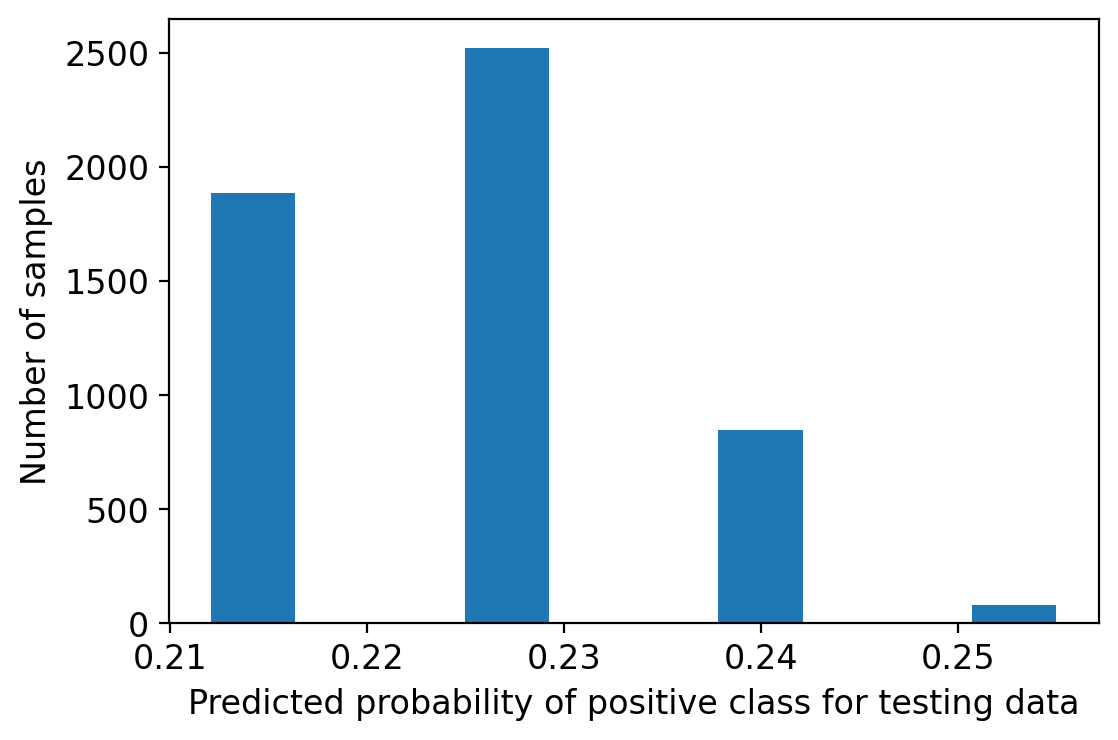

In [34]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

As all the predicted probabilites are below 0.5 (the threshold), this is the reason every sample was predicted negative. Moving the threshold down to 0.25 will include the samples in the right most bin. We will create a stacked histogram to visualize how many of the samples actually have positive labels, to see if it is even worth changing the decision threshold to 0.25.

Text(0, 0.5, 'Number of samples')

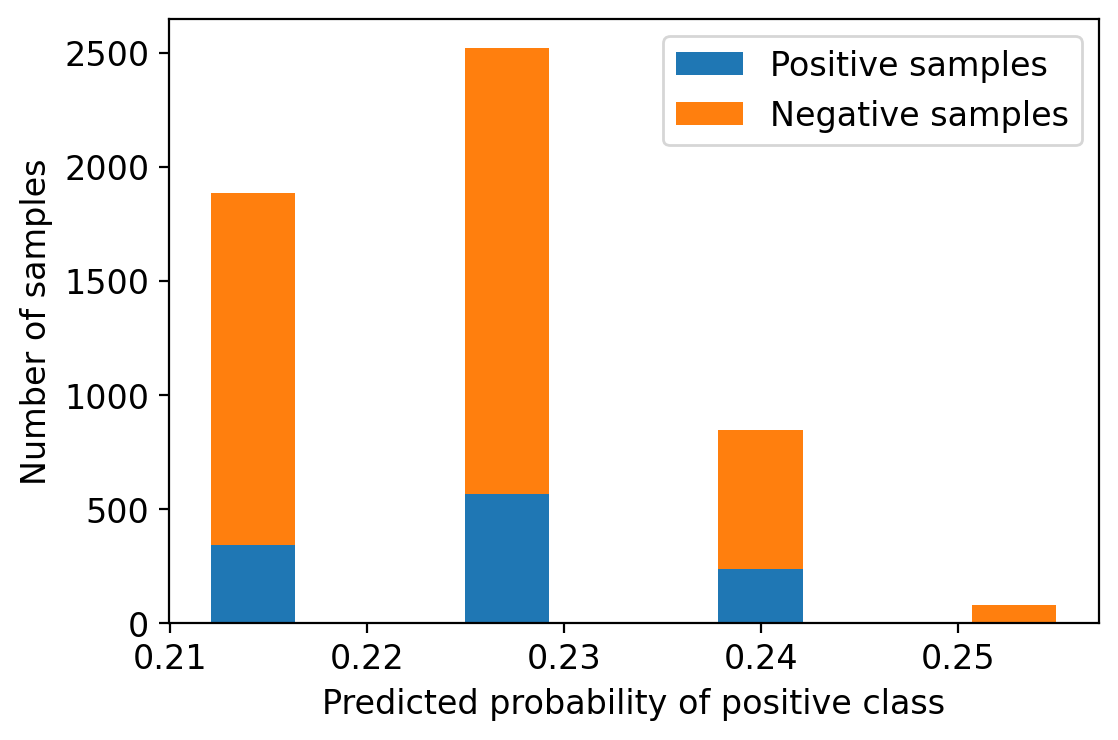

In [35]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0] 

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

As the majority of the samples at 0.25+ are still negative, changing the decision threshold to 0.25 will infact increase the false positive rate and further hurt the accuracy of the model. <br>

To decide on a good threshold, we will use the __ROC Curve__ or the "Receiver Operating Characteristic". <br>
It is a plot of the pairs of TPR (y-axis) and FPR (x-axis) that result from lowering the threshold down from 1 all the way to 0. <br>

Note at threshold of 1, the TPR and FPR are both 0 as there are no positive predictions (Logistic predicts probabilities strictly between 0 and 1). As the threshold gets closer to 0, every sample is predicted to be positive, including ones that are in fact positive and those that are actually negative. Thus the TPR is 1 but also the FPR is also 1. <br>

Using __metrics.roc_curve()__ from sklearn will return arrays of TPRs, FPR,s and the thresholds that lead to them. Thus we can plot these.

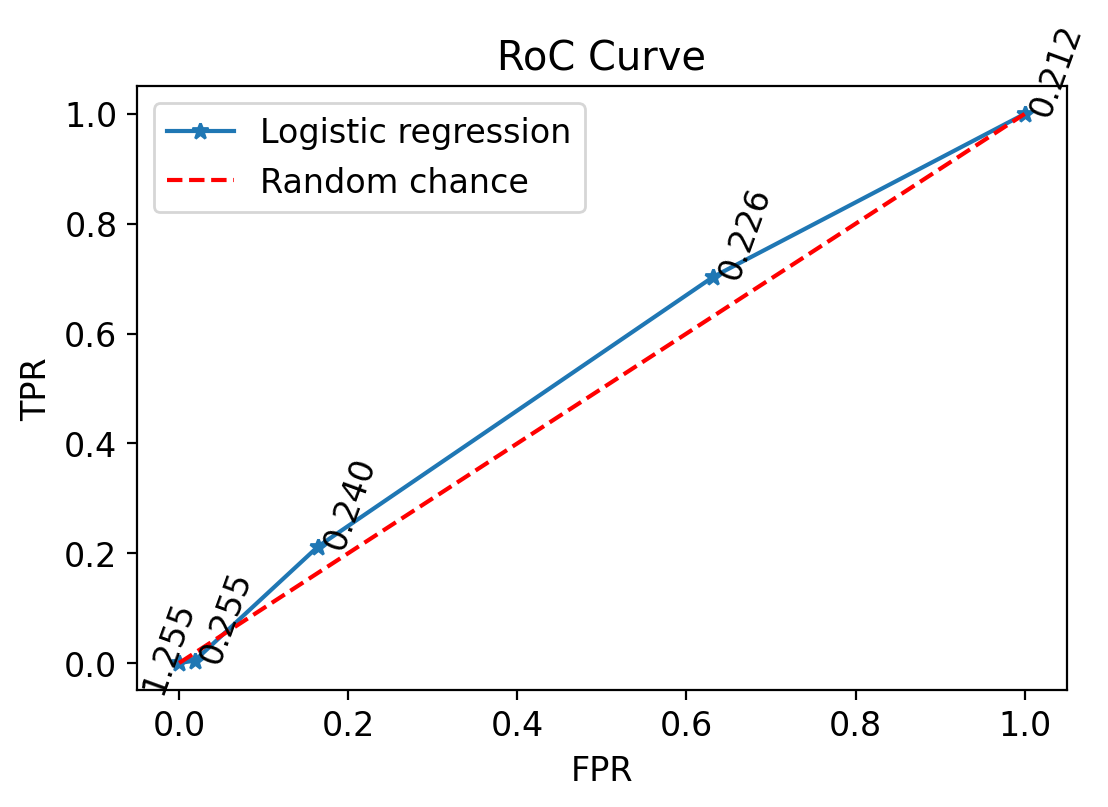

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RoC Curve')
for i, label in enumerate(thresholds):
    if i == 0: 
        plt.text(fpr[i]-0.05, tpr[i]-0.05, "{0:.3f}".format(label), rotation=70)
        continue
    plt.text(fpr[i], tpr[i], "{0:.3f}".format(label), multialignment='left', rotation=70)

In [37]:
thresholds, thresholds.shape

(array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085]), (5,))

Note that the __AUC (Area under the Curve)__ of a perfect classier will be 1, as this will correspond to a $[0,1] \times [0,1]$ rectangle; i.e. the curve will hug the point (0,1) which corresponds to TPR = 1 and FPR = 0, and shoot sharply to the right at (1,1). The random chance line is the probability (coin flip) of having equal chance to get either positive or negative outcome. The __ROC AUC__ is a key metric for the quality of a classifier and is also referred to as the __C-statistic__. <br>

To calculate the area under the ROC curve, can use __metrics.roc_auc_score()__.

In [38]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

<h1> Precision </h1> <br>
This diagnostic, like the ROC curve, is useful over a range of thresholds. It is defined as <br>
precision $$= \frac{TP}{TP+FP}$$. 

To interpret this, at a high threshold, there will be relatively few samples predicted as positive. As it is lowered, more and more will be predicted as positive. We hope as this changes, the rate of true positives (TP) > false positives (FP). Precision is the ratio of TP to the sum of TP and FP. The denominator thus is the total number of positive predictions. <br>

So Precision measures the ratio of positive predictions that are correct, to all positive predictions. Precision is also called __positive predictive value__. This is often used when the classes are very imbalanced and focused on geting good model performance in sense of correctness of positive predictions. <br>

Scikit-learn uses __metrics.precision_recall_curve()__ to calculate precision; (Recall = TPR). 


In [77]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), 
df['default payment next month'].values, test_size=0.2, random_state=24)

np.mean(y_train), np.mean(y_test)

(0.22102210221022103, 0.22412241224122412)

In [78]:
new_lr = LogisticRegression(C=0.1, class_weight=None, fit_intercept=True, dual=False, intercept_scaling=1, max_iter=100,
n_jobs=None, multi_class='auto', penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False )

new_lr.fit(X_train_2, y_train_2)

y_new_predict_proba = new_fitted_lr.predict_proba(X_test_2)[:,-1]
y_new_predict_proba, y_new_predict_proba.shape, y_test_2.shape

(array([0.24924271, 0.41469743, 0.2012791 , ..., 0.41469743, 0.17007907,
        0.33422006]),
 (5333,),
 (5333,))

In [79]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_2, y_new_predict_proba)

0.6201990844642832

The __roc_auc_score()__ with respect to the __LIMIT_BAL__ feature is .10 higher than that of __EDUCATION__ feature.

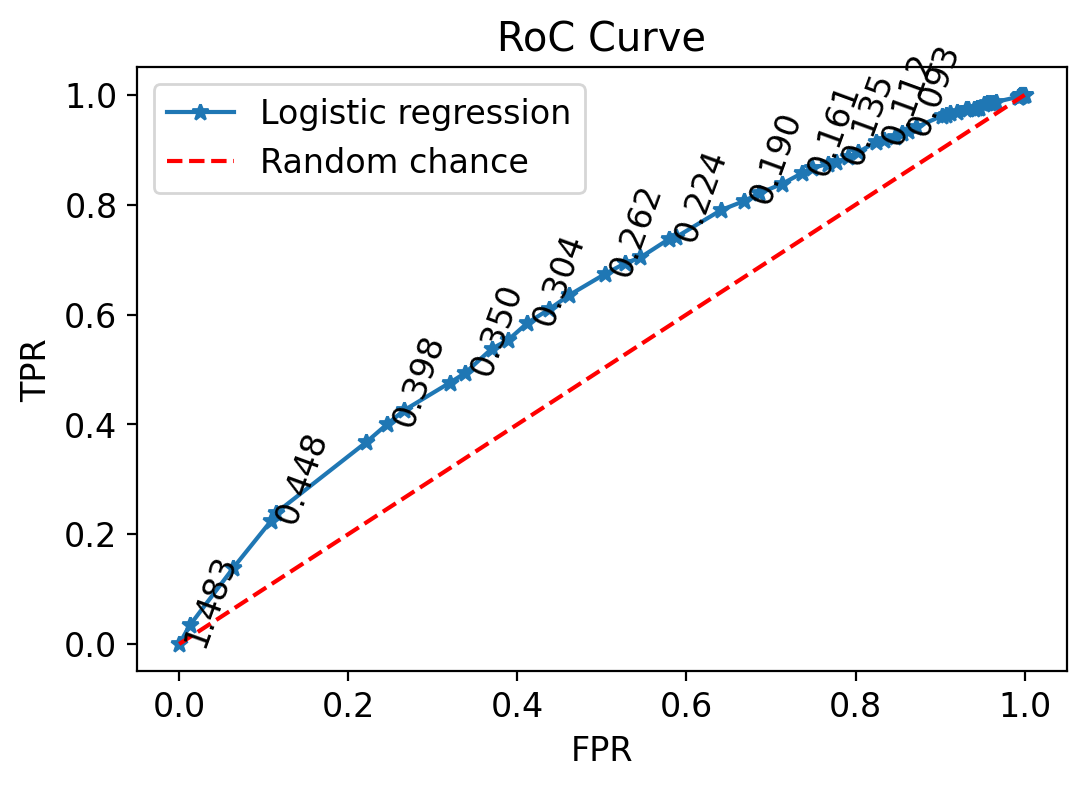

In [80]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_new_predict_proba)
plt.plot(fpr, tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('RoC Curve')
for i, label in enumerate(thresholds):
    if i%3 == 0:
        plt.text(fpr[i], tpr[i], "{0:.3f}".format(label), rotation=70)
        continue
    if i > 33: break

In [81]:
thresholds, thresholds.shape

(array([1.48277783, 0.48277783, 0.46559647, 0.44849636, 0.43151717,
        0.41469743, 0.39807421, 0.3816828 , 0.36555644, 0.34972605,
        0.33422006, 0.31906424, 0.30428159, 0.28989225, 0.27591352,
        0.2623598 , 0.24924271, 0.23657109, 0.2243512 , 0.21258674,
        0.2012791 , 0.19042746, 0.180029  , 0.17007907, 0.16057137,
        0.15149815, 0.14285037, 0.1346179 , 0.12678969, 0.11935391,
        0.11229814, 0.10560946, 0.09927461, 0.09328012, 0.08761239,
        0.08225779, 0.07720276, 0.07243385, 0.06793784, 0.06370174,
        0.05971284, 0.0559588 , 0.0524276 , 0.04910765, 0.04598773,
        0.04305704, 0.04030524, 0.03772236, 0.03529892, 0.03302583,
        0.03089443, 0.02889647, 0.02702412, 0.02526993, 0.02362684,
        0.02208817, 0.01929909, 0.01803705, 0.01575128, 0.01471776,
        0.01375111, 0.00978212, 0.00796962, 0.00744284, 0.00606112]),
 (65,))

Now to plot the __Precision-Recall Curve__

Precision = $\frac{TP}{TP+FP}$ <br>
The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.<br>
Recall = $\frac{TP}{TP+FN}$ <br>
The recall is intuitively the ability of the classifier to find all the positive samples. <br>

Text(0.5, 1.0, 'Precision-Recall Curve')

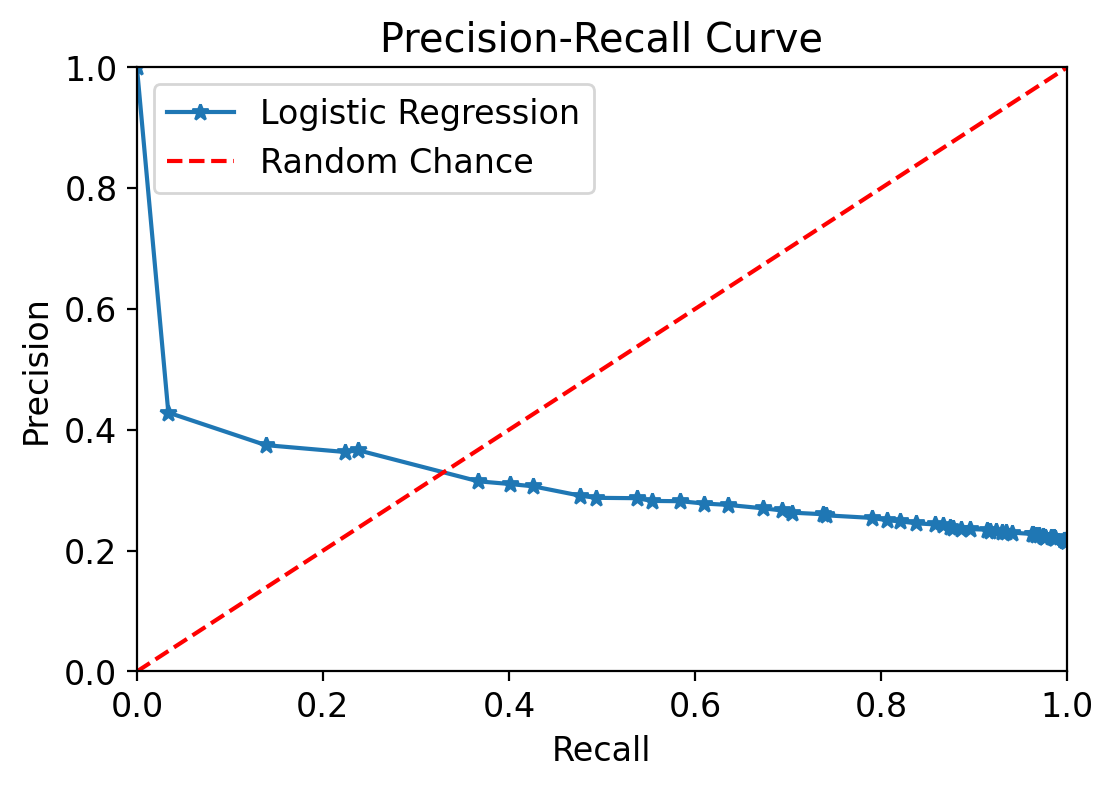

In [82]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_2, y_new_predict_proba)
plt.plot(recall,precision, '*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic Regression','Random Chance'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Precision-Recall Curve')


In [83]:
thresholds, thresholds.shape

(array([0.00744284, 0.00796962, 0.00978212, 0.01200184, 0.01375111,
        0.01471776, 0.01575128, 0.01803705, 0.01929909, 0.02064758,
        0.02208817, 0.02362684, 0.02526993, 0.02702412, 0.02889647,
        0.03089443, 0.03302583, 0.03529892, 0.03772236, 0.04030524,
        0.04305704, 0.04598773, 0.04910765, 0.0524276 , 0.0559588 ,
        0.05971284, 0.06370174, 0.06793784, 0.07243385, 0.07720276,
        0.08225779, 0.08761239, 0.09328012, 0.09927461, 0.10560946,
        0.11229814, 0.11935391, 0.12678969, 0.1346179 , 0.14285037,
        0.15149815, 0.16057137, 0.17007907, 0.180029  , 0.19042746,
        0.2012791 , 0.21258674, 0.2243512 , 0.23657109, 0.24924271,
        0.2623598 , 0.27591352, 0.28989225, 0.30428159, 0.31906424,
        0.33422006, 0.34972605, 0.36555644, 0.3816828 , 0.39807421,
        0.41469743, 0.43151717, 0.44849636, 0.46559647, 0.48277783]),
 (65,))

Want to calculate the area under the precision-recall curve. Note that this uses the trapezoid-rule, which can be applied to any x-y data set

In [84]:
from sklearn.metrics import auc

auc(recall, precision), auc(fpr, tpr)

(0.31566964427378624, 0.6201990844642832)

This makes sense as for nearly all of the range of thresholds, the precision, or portion of positive classifications that are correct, is less than half. <br>

Now to recalculate ROC AUC using the training data.

In [86]:
y_train_2_pred_proba = new_lr.predict_proba(X_train_2)
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,-1])

0.6182918113358344

We see that this AUC is not significantly different from the test set. Thus the model does as well on out-of-sample data as it does on the same dfata used in training the model. 